<img src="https://www.nimbous.co/wp-content/uploads/2019/07/scikit-learn-logo-1024x300.png" />


In [1]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [2]:
# standard imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
# Get the data Ready
heart_disease = pd.read_csv('./scikit-learn-data/heart-disease.csv')

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Create X ( features matrix )
x = heart_disease.drop( 'target' , axis=1 )

# Create Y ( Labels) 
y = heart_disease['target']

In [6]:
# choose the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators = 100)

# keep the default hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# fit the model to the training data 
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2)

In [8]:
clf.fit(x_train , y_train );

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2


In [10]:
# make a prediction 
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [11]:
y_test

90     1
236    0
232    0
63     1
199    0
      ..
2      1
262    0
84     1
122    1
264    0
Name: target, Length: 61, dtype: int64

In [12]:
# Evaluate the model on the training data and test data
clf.score(x_train , y_train )
# Return the mean accuracy on the given test data and labels.

1.0

In [13]:
clf.score( x_test , y_test )

0.8360655737704918

In [14]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print( classification_report( y_test , y_preds ) )

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [15]:
confusion_matrix( y_test , y_preds)

array([[22,  6],
       [ 4, 29]], dtype=int64)

In [16]:
accuracy_score( y_test , y_preds )

0.8360655737704918

In [17]:
# improve a model 
# try different amount of n_estimators
np.random.seed(42)
for i in range(10 ,100 , 10):
    print(f"trying the model with {i} estimators " )
    clf = RandomForestClassifier(n_estimators=i ).fit(x_train , y_train)
    print(f" Model accuracy on test set: {clf.score( x_test , y_test ) * 100:2f}% " )
    print(" ")

trying the model with 10 estimators 
 Model accuracy on test set: 85.245902% 
 
trying the model with 20 estimators 
 Model accuracy on test set: 81.967213% 
 
trying the model with 30 estimators 
 Model accuracy on test set: 83.606557% 
 
trying the model with 40 estimators 
 Model accuracy on test set: 83.606557% 
 
trying the model with 50 estimators 
 Model accuracy on test set: 85.245902% 
 
trying the model with 60 estimators 
 Model accuracy on test set: 85.245902% 
 
trying the model with 70 estimators 
 Model accuracy on test set: 85.245902% 
 
trying the model with 80 estimators 
 Model accuracy on test set: 80.327869% 
 
trying the model with 90 estimators 
 Model accuracy on test set: 80.327869% 
 


In [18]:
# save the model 
import pickle 

# pickle.dump( clf , open("random_forst_model_1.pkl " , "wb") )

In [19]:
loaded_model = pickle.load(open("random_forst_model_1.pkl" , "rb") )
loaded_model.score( x_test , y_test )

0.9672131147540983

## Getting our data ready to be used with machine learning

Three main things we have to do:

1. **Split the data into features and labels** (usually X & y)
   
2. **Filling** (also called imputing) **or disregarding missing values**
   
3. **Converting non-numerical values to numerical values** (also called feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x = heart_disease.drop( 'target' , axis=1 )
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# split the data into training and test sets 
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x ,
                                                       y ,
                                                       test_size=0.3) 

In [24]:
x_train.shape  , x_test.shape , y_train.shape , y_test.shape 

((212, 13), (91, 13), (212,), (91,))

In [25]:
x.shape[0] * 0

0

In [26]:
len( heart_disease )

303

## Make sure it`s all numerical 

In [27]:
car_sales = pd.read_csv("./scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [32]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [36]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [37]:
# Another way to do it with pd.dummies 
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies = dummies.astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
# refit the model 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split( transformed_X ,
                                                   y ,
                                                   test_size=0.2)
model.fit(X_train ,y_train )

RandomForestRegressor()

In [39]:
model.score(X_test,y_test)

0.3235867221569877

In [40]:
import sklearn
print(sklearn.__version__)


1.3.0


**Handle missing values**:
   - **Fill them with some value** (also known as imputation)
   - **Remove the samples with missing data altogether**

In [41]:
# import the care sales missing Data 
car_sales_missing = pd.read_csv('./scikit-learn-data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# create X & Y 
x1 = car_sales_missing.drop('Price' , axis=1)
x1.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [44]:
y1 = car_sales_missing['Price']
y1.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [45]:
# convert the data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(x1)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [46]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


## Fill the missing data with pandas

In [47]:
car_sales_missing['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [48]:
# fill the 'make' column 
car_sales_missing['Make'].fillna('missing' , inplace=True)
# fill the colour column 
car_sales_missing['Colour'].fillna('missing' , inplace=True)
# fill the `Odometer (KM) ` column 
car_sales_missing['Odometer (KM)'].fillna( car_sales_missing['Odometer (KM)'].mean() , inplace=True)
# fill the Doors column 
car_sales_missing['Doors'].fillna(4 , inplace=True)

In [49]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [50]:
# remove rows with missing price value 
car_sales_missing.dropna(inplace=True)

In [51]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [52]:
len(car_sales_missing)

950

In [53]:
# create X & Y 
x1 = car_sales_missing.drop('Price' , axis=1)
x1.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [54]:
y1 = car_sales_missing['Price']
y1.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [55]:
# convert the data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 fill the mising values with SkLearn

In [56]:
car_sales_missing2 = pd.read_csv('./scikit-learn-data/car-sales-extended-missing-data.csv')
car_sales_missing2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [57]:
car_sales_missing2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
# Drop the rows with no labels
car_sales_missing2.dropna(subset=['Price'] , inplace=True )
car_sales_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
# split into X & Y 
x2 = car_sales_missing2.drop( 'Price' , axis=1 )
x2.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [60]:
y2 = car_sales_missing2['Price']
y2.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [61]:
# fill missing value with Sklearn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# fill the categorical values with 'missing' & numerical values with mean 
cat_imputer = SimpleImputer( strategy='constant' , fill_value='missing'  )
door_imputer = SimpleImputer( strategy='constant' , fill_value=4 )
num_imputer = SimpleImputer( strategy='mean' )

# Define columns 
cat_features = [ 'Make' ,'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#create imputer ==> to to fill the missing data 
imputer = ColumnTransformer([
    ('cat_imputer' , cat_imputer , cat_features),
    ('door_imputer' , door_imputer , door_features),
    ('num_imputer' , num_imputer , num_features )
])

# Transform the data 
filled_x = imputer.fit_transform(x2)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [62]:
car_sales_filled = pd.DataFrame(filled_x ,
                               columns=['Make' , 'Colour' , 'Doors' , 'Odometer (KM)' ] )
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [63]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [64]:
# convert the data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X2 = transformer.fit_transform( car_sales_filled )
transformed_X2

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [65]:
# now we`ve got our data as numbers and filled (no missing values )
# let`s fit the model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(transformed_X2 , 
                                                      y2 , 
                                                      test_size=0.2 )

model = RandomForestRegressor( n_estimators=100 )
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.21990196728583944

In [66]:
len(car_sales_filled) , len(car_sales)

(950, 1000)

# Choosing the right estimator 

<img src='https://scikit-learn.org/stable/_static/ml_map.png' />


 # Choosing the Right Estimator/Algorithm for Your Problem

## The Art of Selecting the Perfect Model

In the vast landscape of machine learning, navigating through the myriad of algorithms can be akin to traversing a dense jungle without a compass. Fear not, for sklearn offers a map—a guiding light illuminating the path to the ideal estimator for your specific task.

### Deciphering the Terrain

Before embarking on our journey, it's crucial to understand the lay of the land. In the realm of sklearn, estimators are the pillars upon which our models stand tall. For classification endeavors—divining whether a patient suffers from heart disease or not—we harness the power of classifiers, often affectionately abbreviated as `clf`. Conversely, in the realm of regression—predicting the selling price of a car—we seek algorithms adept at forecasting numerical values with precision.

### Navigating with Sklearn's Machine Learning Map

When faced with the daunting task of selecting the optimal model for a regression conundrum, we turn to Sklearn's venerable Machine Learning Map. This cartographic marvel lays out a clear path amidst the tangled undergrowth of algorithms, guiding us to our destination with grace and efficiency. Behold its majesty: [Sklearn Machine Learning Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

#### 2.1 A Quest for the Ideal Regression Model

Our odyssey commences with the California Housing dataset—a treasure trove of real estate insights ripe for exploration. This dataset, a testament to the allure of the Golden State, beckons us to uncover its secrets and extract valuable knowledge.

[California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

As we embark on our expedition, armed with Sklearn's guidance and fortified by our determination, we shall navigate the labyrinth of algorithms and emerge victorious, wielding the perfect model to tame the untamed wilderness of regression.

Let us forge ahead, intrepid explorers, for the realm of machine learning awaits, eager to reveal its mysteries to those bold enough to seek them.


In [67]:
# California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [68]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [69]:
housing_df = pd.DataFrame(housing['data'] , columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
# housing_df = housing_df.drop('MedHouseVal' , axis=1 )
# housing_df

In [72]:
# import Algorithm 
from sklearn.linear_model import Ridge
# setup Random seed 
np.random.seed(42)
# create the data ( X & Y  )
X = housing_df.drop('target' , axis=1)
Y = housing_df['target'] # Median house price in $100.000

# split the data and test sets 
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, Y_train )

# check the score of the model (on the test set )
model.score(X_test , Y_test)


0.5758549611440126

In [73]:
# import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

# setup Random seed 
np.random.seed(42)
# create the data ( X & Y  )
X = housing_df.drop('target' , axis=1)
Y = housing_df['target'] # Median house price in $100.000

# split the data and test sets 
X_train , X_test , Y_train , Y_test = train_test_split(X ,
                                                       Y ,
                                                       test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, Y_train )

# check the score of the model (on the test set )
model.score(X_test , Y_test)


0.8065734772187598

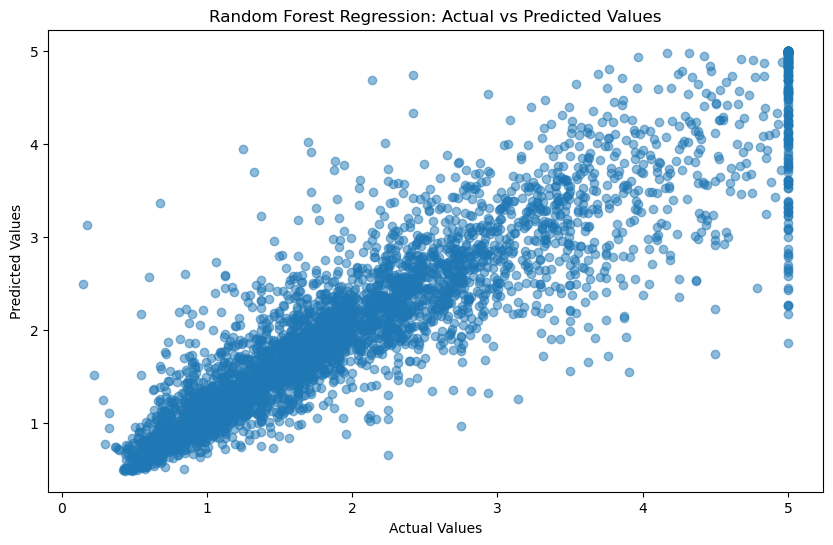

In [74]:
import matplotlib.pyplot as plt

# Predict on the test set
Y_pred = model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.show()


# Choosing an estimator for a Classification problem

In [75]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
len(heart_disease)

303

# Consulting the map and its say to try `LinearSVC`

In [77]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC 
# Setup random seed 
np.random.seed(42)
# make the data  X & Y
x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

# split the data and test sets 
x_train , x_test , y_train , y_test = train_test_split( x,
                                                      y,
                                                      test_size=0.2)
# Instantiate and fit the model (on the training set)
model2 = LinearSVC()
model2.fit(x_train , y_train)

# check the score
model2.score(x_test , y_test)


0.8688524590163934

In [78]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [79]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 
# Setup random seed 
np.random.seed(42)
# make the data  X & Y
x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

# split the data and test sets 
x_train , x_test , y_train , y_test = train_test_split( x,
                                                      y,
                                                      test_size=0.2)
# Instantiate and fit the model (on the training set)
model3 = RandomForestClassifier()
model3.fit(x_train , y_train)

# check the score
model3.score(x_test , y_test)


0.8524590163934426

Tidbit:
    
    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

##  Fit the model/algorithm on our data and use it to make predictions

### Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [80]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [81]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 
# Setup random seed 
np.random.seed(42)
# make the data  X & Y
x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

# split the data and test sets 
x_train , x_test , y_train , y_test = train_test_split( x,
                                                      y,
                                                      test_size=0.2)
# Instantiate and fit the model (on the training set)
model3 = RandomForestClassifier()
model3.fit(x_train , y_train)

# check the score
model3.score(x_test , y_test)


0.8524590163934426

In [82]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [83]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

# use a trained model to make predictions


In [84]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [85]:
model3.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [86]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [87]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# Compare predictions to truth labels to evaluate the model

In [88]:
y_preds = model3.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [89]:
model3.score(x_test , y_test)

0.8524590163934426

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make predictions with `predict_proba()` - use this if someone asks you "what's the probability your model is assigning to each prediction?"

In [91]:
# predict_proba() returns probabilities of a classification label 
model3.predict_proba(x_test[ : 5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [92]:
# predict in the same data 
model3.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

## Predicting Probabilities on Binary Labels (0/1)

In machine learning, models often aim not only to predict the correct label (0 or 1 in your case), but also to estimate the likelihood (probability) that a particular prediction is true. This provides valuable information beyond just the label itself.

**Scenario:** Imagine a model classifying emails as spam (1) or not spam (0). Predicting a probability score alongside the label allows you to:

* **Set confidence thresholds:** You can filter out predictions with low probabilities (e.g., below 70%), potentially reducing false positives (incorrectly classifying non-spam emails as spam).
* **Rank predictions:** Sort emails based on their probability of being spam, helping users prioritize which emails to review first.


In [93]:
# Sample data and predictions
# Print results with labels and probabilities
for i in range(len(x_test)):
    prediction = model3.predict([x_test.iloc[i]])[0]
    probability = model3.predict_proba([x_test.iloc[i]])[0][prediction]
    print(f"Data point: {x_test.iloc[i]} | Predicted label: {prediction} (probability: {probability:.2f})")


Data point: age          57.0
sex           1.0
cp            0.0
trestbps    150.0
chol        276.0
fbs           0.0
restecg       0.0
thalach     112.0
exang         1.0
oldpeak       0.6
slope         1.0
ca            1.0
thal          1.0
Name: 179, dtype: float64 | Predicted label: 0 (probability: 0.89)
Data point: age          59.0
sex           1.0
cp            3.0
trestbps    170.0
chol        288.0
fbs           0.0
restecg       0.0
thalach     159.0
exang         0.0
oldpeak       0.2
slope         1.0
ca            0.0
thal          3.0
Name: 228, dtype: float64 | Predicted label: 1 (probability: 0.51)
Data point: age          57.0
sex           1.0
cp            2.0
trestbps    150.0
chol        126.0
fbs           1.0
restecg       1.0
thalach     173.0
exang         0.0
oldpeak       0.2
slope         2.0
ca            1.0
thal          3.0
Name: 111, dtype: float64 | Predicted label: 1 (probability: 0.57)
Data point: age          56.0
sex           0.0
cp           

### `predict()` can also be used for regression models

In [94]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [95]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data X & Y 
x = housing_df.drop( 'target' , axis=1 )
y = housing['target']

x_train , x_test , y_train , y_test = train_test_split( x,
                                                      y, 
                                                      test_size=0.2)
model4 = RandomForestRegressor()
model4.fit(x_train , y_train)

y_preds = model4.predict(x_test)

In [96]:
y_preds[:5]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  ])

In [97]:
import pandas as pd

def print_predictions(model, x_test, y_test):
    x_test_df = pd.DataFrame(x_test, columns=x.columns)  # Convert x_test to DataFrame
    y_test_df = pd.Series(y_test)  # Convert y_test to Series
    
    for i in range(len(x_test_df)):
        prediction = model.predict([x_test_df.iloc[i]])[0]
        print(f"Data point: {x_test_df.iloc[i]} | Predicted value: {prediction:.2f} | True value: {y_test_df.iloc[i]:.2f}")

# Usage example
print_predictions(model4, x_test, y_test)


Data point: MedInc           1.681200
HouseAge        25.000000
AveRooms         4.192201
AveBedrms        1.022284
Population    1392.000000
AveOccup         3.877437
Latitude        36.060000
Longitude     -119.010000
Name: 20046, dtype: float64 | Predicted value: 0.49 | True value: 0.48
Data point: MedInc           2.531300
HouseAge        30.000000
AveRooms         5.039384
AveBedrms        1.193493
Population    1565.000000
AveOccup         2.679795
Latitude        35.140000
Longitude     -119.460000
Name: 3024, dtype: float64 | Predicted value: 0.75 | True value: 0.46
Data point: MedInc           3.480100
HouseAge        52.000000
AveRooms         3.977155
AveBedrms        1.185877
Population    1310.000000
AveOccup         1.360332
Latitude        37.800000
Longitude     -122.440000
Name: 15663, dtype: float64 | Predicted value: 4.93 | True value: 5.00
Data point: MedInc           5.737600
HouseAge        17.000000
AveRooms         6.163636
AveBedrms        1.020202
Population  

In [110]:
# def print_predictions(model, x_test, y_test):
#     x_test_df = pd.DataFrame(x_test, columns=x.columns)  # Convert x_test to DataFrame
#     y_test_df = pd.Series(y_test)  # Convert y_test to Series
    
#     for i in range(len(x_test_df)):
#         prediction = model.predict([x_test_df.iloc[i]])[0]
#         data_point_str = x_test_df.iloc[i].to_string(header=False, index=False)  # Convert the data point to a string without header and index
#         true_value = y_test_df.iloc[i]
#         print(f"Data point:\n{data_point_str}\nPredicted value: {prediction:.2f} | True value: {true_value:.2f}\n")

# # Usage example
# print_predictions(model4, x_test, y_test)


In [99]:
y_preds[:7]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  ])

In [100]:
y_test[:7]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ])

In [101]:
len(y_preds)

4128

In [102]:
len(y_test)

4128

In [103]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , y_preds)

0.32659871732073664

In [104]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# Evaluating a Model

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Across the board, the main idea of evaluating a model is to compare the model's predictions to what they should've ideally been (the truth labels).

Scikit-Learn implements three different methods of evaluating models:

1. **The `score()` method**: 
    - Calling `score()` on a model instance will return a metric associated with the type of model you're using. 
    - The metric depends on which model you're using.

2. **The `scoring` parameter**: 
    - This parameter can be passed to methods such as `cross_val_score()` or `GridSearchCV()` to tell Scikit-Learn to use a specific type of scoring metric.

3. **Problem-specific metric functions available in `sklearn.metrics`**:
    - Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as standalone functions.

The scoring function you use will also depend on the problem you're working on.

- **Classification problems** have different evaluation metrics and scoring functions compared to **regression problems**.


# Evaluating The Model with   The `score()` method

In [105]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);


In [106]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

Once the model has been fit on the training data (`X_train`, `y_train`), we can call the `score()` method on it and evaluate our model on the test data, data the model has never seen before (`X_test`, `y_test`).

Each model in Scikit-Learn implements a default metric for `score()` which is suitable for the problem.

For example:

- **Classifier models** generally use `metrics.accuracy_score()` as the default `score()` metric.
- **Regression models** generally use `metrics.r2_score` as the default `score()` metric.

There are many more classification and regression specific metrics implemented in `sklearn.metrics`.

Because `clf` is an instance of `RandomForestClassifier`, the `score()` method uses mean accuracy as its score method.

You can find this by pressing `SHIFT + TAB` (inside a Jupyter Notebook, may be different elsewhere) within the brackets of `score()` when called on a model instance.

Behind the scenes, `score()` makes predictions on `X_test` using the trained model and then compares those predictions to the actual labels `y_test`.

A classification model which predicts everything 100% correct would receive an accuracy score of 1.0 (or 100%).

Our model doesn't get everything correct, but at ~85% accuracy (0.85 * 100), it's still far better than guessing.

In [107]:
from sklearn.ensemble import RandomForestRegressor 
np.random.seed(42)

# create the data 
x = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test sets
x_train , x_test , y_train , y_test = train_test_split( x ,
                                                      y , 
                                                      test_size=0.2)
# create model instance 
model = RandomForestRegressor(n_estimators=10 )
# fit the model
model.fit(x_train , y_train)

RandomForestRegressor(n_estimators=10)

In [108]:
model.score(x_train , y_train)

0.9626597968483063

In [109]:
model.score(x_test,y_test)

0.7869919586520553

# Evaluating Your Models Using the Scoring Parameter

The next step up from using `score()` is to use a custom scoring parameter with `cross_val_score()` or `GridSearchCV`.

As you may have guessed, the scoring parameter you set will be different depending on the problem you're working on.

We'll see some specific examples of different parameters in a moment, but first let's check out `cross_val_score()`.

To do so, we'll copy the heart disease classification code from above and then add another line at the top.


In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

x_train , x_test , y_train , y_test = train_test_split(x ,
                                                      y ,
                                                      test_size=0.2)
clf = RandomForestClassifier( n_estimators=100 )
clf.fit(x_train, y_train);


In [118]:
clf.score(x_test, y_test)

0.8524590163934426

In [120]:
cross_val_score(clf , x , y , cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [121]:
cross_val_score(clf , x , y , cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [122]:
np.random.seed(42)

# single training and test split score 
clf_single_score = clf.score(x_test , y_test)
# take the mean of the 5_fold cross-validation score 
clf_cross_val_score = np.mean(cross_val_score(clf , x, y, cv=5 ))

# compare the two 
clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

In [124]:
# Default scoring parameter of classifier = mean accuracy 
# clf.score()

In [125]:
# scoring parameter set to None by default 
cross_val_score(clf , x, y, cv=5 , scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# Classification Model Evaluation Metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

1. **Accuracy**
2. **Area Under ROC Curve (Receiver Operating Characteristic Curve)**
3. **Confusion Matrix**
4. **Classification Report**

## Accuracy

Accuracy is the simplest and most intuitive metric for classification models. It is the ratio of correctly predicted instances to the total instances in the dataset.

**Formula:**
\[ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \]


In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target' , axis=1)
y = heart_disease['target']

# x_train , y_train , x_test , y_test = train_test_split(x ,
#                                                       y , 
#                                                       test_size=0.2)

clf= RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y , cv=5)


In [128]:
np.mean(cross_val_score)

0.8248087431693989

# Accuracy as a Default Metric

Accuracy is the default metric for the `score()` function within each of Scikit-Learn's classifier models. It's probably the metric you'll see most often used for classification problems.

## Understanding Accuracy

Accuracy is the ratio of correctly predicted instances to the total instances in the dataset.


In [130]:
print(f"Heart Disease Classifier Cross_validated Accuracy : {np.mean(cross_val_score) *100:.2f}% ")

Heart Disease Classifier Cross_validated Accuracy : 82.48% 


# Area Under Receiver Operating Characteristic (ROC) Curve

If this one sounds like a mouthful, it's because reading the full name is.

It's usually referred to as **AUC** for **Area Under Curve** and the curve they're talking about is the **Receiver Operating Characteristic** or **ROC** for short.

So if you hear someone talking about AUC or ROC, they're probably talking about what follows.

## Understanding ROC Curves

ROC curves are a comparison of true positive rate (TPR) versus false positive rate (FPR).

For clarity:

- **True Positive (TP)**: Model predicts 1 when the truth is 1.
- **False Positive (FP)**: Model predicts 1 when the truth is 0.
- **True Negative (TN)**: Model predicts 0 when the truth is 0.
- **False Negative (FN)**: Model predicts 0 when the truth is 1.

### Definitions:

- **True Positive Rate (TPR)**: Also known as Recall or Sensitivity.
  \[ \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} \]

- **False Positive Rate (FPR)**:
  \[ \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} \]

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the `roc_curve` function.


In [131]:
# create the x_test 
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)

In [146]:
from sklearn.metrics import roc_curve
# fit the classifier 
clf.fit(x_train , y_train )
# make predictions with probabilities 
y_prebs = clf.predict_proba(x_test)
y_prebs[:10], len(y_probs)

(array([[0.57, 0.43],
        [0.23, 0.77],
        [0.52, 0.48],
        [0.72, 0.28],
        [0.58, 0.42],
        [0.12, 0.88],
        [0.32, 0.68],
        [0.97, 0.03],
        [0.07, 0.93],
        [0.41, 0.59]]),
 61)

In [148]:
y_prebs_positive = y_prebs[:, 1]
y_prebs_positive[:10]

array([0.43, 0.77, 0.48, 0.28, 0.42, 0.88, 0.68, 0.03, 0.93, 0.59])

In [149]:
# caculate fpr , tpr and thresholds
fpr , tpr , thresholds = roc_curve(y_test , y_prebs_positive)

In [150]:
# check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.10344828, 0.10344828,
       0.10344828, 0.13793103, 0.17241379, 0.17241379, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.37931034,
       0.37931034, 0.4137931 , 0.4137931 , 0.44827586, 0.44827586,
       0.65517241, 0.65517241, 0.82758621, 0.96551724, 1.        ])

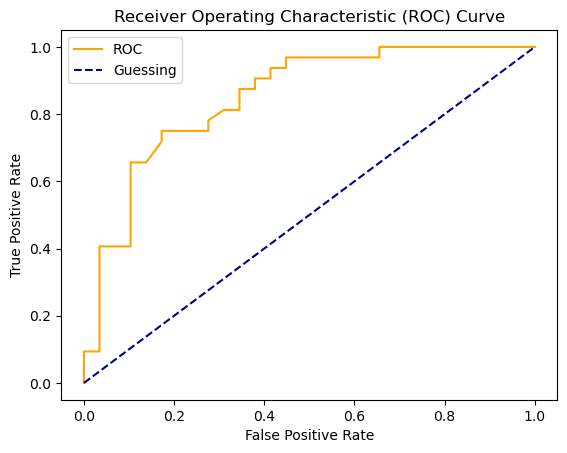

In [151]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

# Understanding the ROC Curve

Looking at the ROC plot for the first time, it might seem a bit confusing.

The main thing to take away here is that our model is doing far better than guessing.

## Quantifying the ROC Curve: AUC

A metric you can use to quantify the ROC curve in a single number is **AUC (Area Under Curve)**.

Scikit-Learn implements a function to calculate this called `sklearn.metrics.roc_auc_score`.

The maximum ROC AUC score you can achieve is 1.0, and generally, the closer to 1.0, the better the model.


In [152]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_prebs_positive)

0.849676724137931

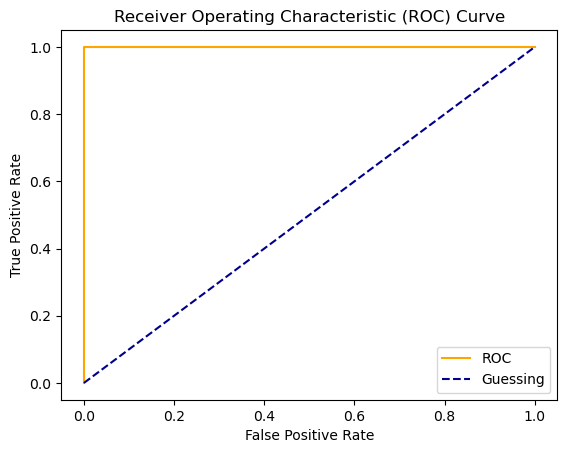

In [153]:
# plot perfect ROC curve and AUC score 
fpr , tpr , thresholds = roc_curve(y_test , y_test)
plot_roc_curve(fpr , tpr )

In [154]:
# plot AUC score
roc_auc_score(y_test , y_test)

1.0

# Confusion Matrix

Another fantastic way to evaluate a classification model is by using a **confusion matrix**.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, it gives you an idea of where the model is getting confused.

## Understanding the Confusion Matrix

A confusion matrix is a table with four different combinations of predicted and actual values:

- **True Positive (TP)**: Model predicts 1, and the actual label is 1.
- **False Positive (FP)**: Model predicts 1, but the actual label is 0.
- **True Negative (TN)**: Model predicts 0, and the actual label is 0.
- **False Negative (FN)**: Model predicts 0, but the actual label is 1.

The confusion matrix helps you visualize the performance of your classification model.


In [155]:
from sklearn.metrics import confusion_matrix
y_prebs = clf.predict(x_test)
confusion_matrix(y_test , y_prebs)

array([[22,  7],
       [ 8, 24]], dtype=int64)

this is probably easier visualized.

One way to do it is with `pd.crosstab()`.

In [158]:
# visualize Confusion Matrix with the pd.crosstab()
pd.crosstab( y_test ,
            y_prebs,
           rownames=['actual Labels'],
           colnames=['predicted Labels'])

predicted Labels,0,1
actual Labels,,
0,22,7
1,8,24


# Creating a Confusion Matrix Using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

- `sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)` 
  - This takes a fitted estimator (like our `clf` model), features (`X`), and labels (`y`). 
  - It then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.

- `sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)` 
  - This takes truth labels and predicted labels and compares them by displaying a confusion matrix.

**Note:** Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn, run:

```python
import sklearn
sklearn.__version__


In [162]:
# import sys 
# !conda install --yes --prefix {sys.prefix} seaborn

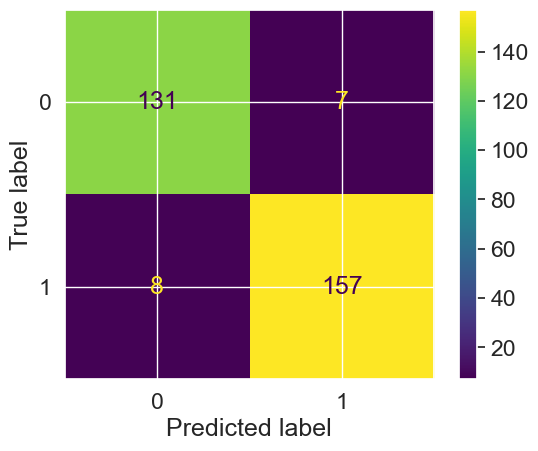

In [161]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [172]:
from sklearn.metrics import confusion_matrix 
y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 8, 24]], dtype=int64)